In [381]:
# import relevant modules
import pandas as pd
# import pandas_profiling as pp
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Feature details of TESLA stock
1. Open: opening price of TESLA shares
2. High: highest price of TESLA shares on the date
3. Low: lowest price of TESLA shares on the date
4. Close: Closing price of TESLA shares on the date
5. Adj Close: Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions
6. Volume: Total number of stocks traded during the day

In [382]:
# Load data
data = pd.read_csv('/home/sushmita/Documents/data_science/TSLA.csv')

In [383]:
# Check data types and null values
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [384]:
# Converting date to Datetime
data['Date']=pd.to_datetime(data.Date)
print(data.info())
# data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB
None


In [6]:
# Getting the Exploratory Data Analysis from pandas_profiling packagea
# pp.ProfileReport(data)

In [385]:
# Summary statistics
print(data.describe())

                                Date         Open         High          Low  \
count                           1258  1258.000000  1258.000000  1258.000000   
mean   2019-02-13 23:51:59.236884224   183.274022   187.265251   178.941224   
min              2016-08-16 00:00:00    36.220001    36.945999    35.397999   
25%              2017-11-13 06:00:00    54.985001    55.930001    53.929001   
50%              2019-02-14 12:00:00    66.602002    67.950001    65.445999   
75%              2020-05-14 18:00:00   165.516998   168.243504   161.504005   
max              2021-08-13 00:00:00   891.380005   900.400024   871.599976   
std                              NaN   227.979867   232.845126   222.443374   

             Close    Adj Close        Volume  
count  1258.000000  1258.000000  1.258000e+03  
mean    183.351102   183.351102  4.441050e+07  
min      35.793999    35.793999  8.297500e+06  
25%      54.994501    54.994501  2.478255e+07  
50%      66.756000    66.756000  3.498150e+07  


# EDA

In [386]:
# Find the duration
start_date=data['Date'].min()
end_date=data['Date'].max()
duration=end_date-start_date
print('Start date :',start_date)
print('End date :',end_date)
print('Duration :',duration)

Start date : 2016-08-16 00:00:00
End date : 2021-08-13 00:00:00
Duration : 1823 days 00:00:00


In [387]:
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


# Observing secular trend of the data

## 1. Method of moving averages
### Take an overview of open and close during this duration

In [388]:
data_open_close=data[['Open','Close']]
data_open_close['Average_open'] = data_open_close['Open'].rolling(window=10,center=True).mean()
data_open_close['Average_open'] = data_open_close['Open'].rolling(window=10,center=True).mean()
data_open_close['Average_close'] = data_open_close['Close'].rolling(window=10,center=True).mean()
data_open_close['STD_open'] = data_open_close['Open'].rolling(window=10,center=True).std()
data_open_close['STD_close'] = data_open_close['Close'].rolling(window=10,center=True).std()
data_open_close[0:10]
# data_open_close[9:19]
# print(type(data_open_close['Open']))
# print(type(data_open_close.Open))

/tmp/ipykernel_26639/2321769866.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_26639/2321769866.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_26639/2321769866.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_2

,Open,Close,Average_open,Average_close,STD_open,STD_close
Date,,,,,,
2016-08-16,45.098000,44.722000,NaN,NaN,NaN,NaN
2016-08-17,44.866001,44.647999,NaN,NaN,NaN,NaN
2016-08-18,44.764000,44.702000,NaN,NaN,NaN,NaN
2016-08-19,44.708000,45.000000,NaN,NaN,NaN,NaN
2016-08-22,44.834000,44.585999,NaN,NaN,NaN,NaN
2016-08-23,44.863998,44.967999,44.7624,44.4380,0.369550,0.580135
2016-08-24,45.410000,44.523998,44.5748,44.1926,0.590421,0.885377
2016-08-25,44.622002,44.192001,44.2968,43.9680,0.970330,1.030072
2016-08-26,44.428001,43.998001,44.0006,43.5132,1.229375,1.545203


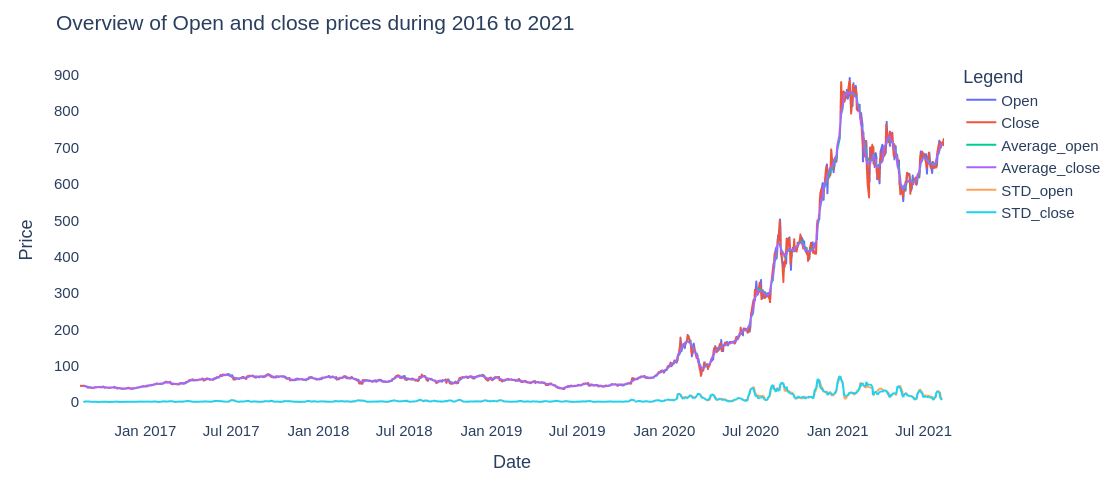

In [389]:
fig=px.line(data_open_close,x=data_open_close.index,y=[data_open_close.Open,data_open_close.Close,
                                                      data_open_close.Average_open,data_open_close.Average_close,
                                                      data_open_close.STD_open,data_open_close.STD_close],labels={'Date':'Date','value'
                                                                                                          :'Price'},width=800,height=500)
fig.update_layout(title='Overview of Open and close prices during 2016 to 2021',font_size=15,
                 legend_title_text='Legend')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({'plot_bgcolor':'white'})
fig.show()

### Take an overview of High and Low during this duration

In [390]:
data_high_low=data[['High','Low']]
data_high_low['Average_high']=data_high_low['High'].rolling(window=10,center=True).mean()
data_high_low['Average_low']=data_high_low['Low'].rolling(window=10,center=True).mean()
data_high_low['STD_low']=data_high_low['Low'].rolling(window=10,center=True).std()
data_high_low['STD_high']=data_high_low['High'].rolling(window=10,center=True).std()
data_high_low[0:10]

/tmp/ipykernel_26639/2609127360.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_26639/2609127360.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_26639/2609127360.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,High,Low,Average_high,Average_low,STD_low,STD_high
Date,,,,,,
2016-08-16,45.438000,44.681999,NaN,NaN,NaN,NaN
2016-08-17,44.966000,44.560001,NaN,NaN,NaN,NaN
2016-08-18,45.132000,44.458000,NaN,NaN,NaN,NaN
2016-08-19,45.034000,44.506001,NaN,NaN,NaN,NaN
2016-08-22,45.021999,44.535999,NaN,NaN,NaN,NaN
2016-08-23,45.698002,44.560001,45.0132,44.2664,0.517717,0.467809
2016-08-24,45.430000,44.444000,44.7916,44.0086,0.833395,0.707616
2016-08-25,44.759998,44.153999,44.5470,43.7256,1.071759,1.002106
2016-08-26,44.571999,43.764000,44.2558,43.2898,1.529247,1.213932


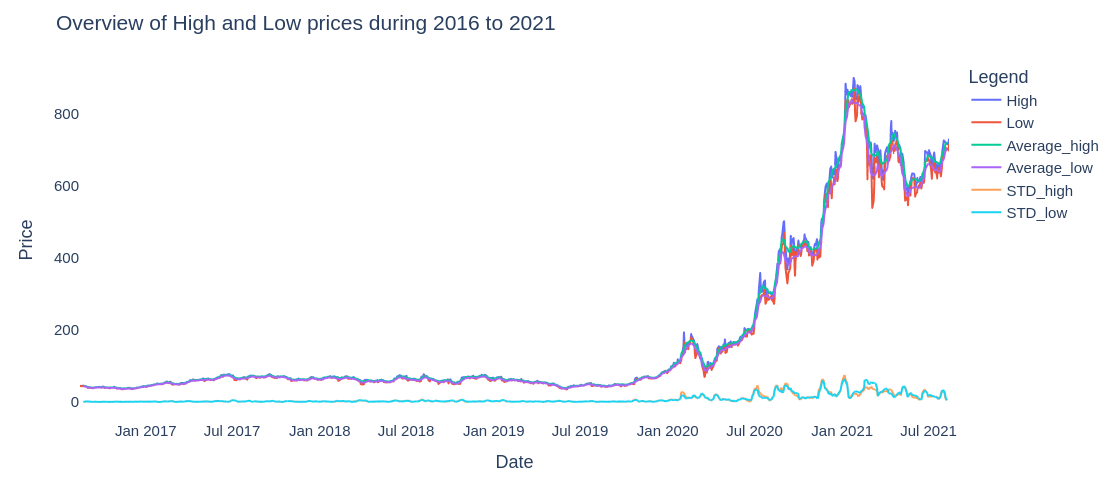

In [66]:
fig=px.line(data_high_low,x=data_high_low.index,y=[data_high_low.High,data_high_low.Low,data_high_low.Average_high,
                                                  data_high_low.Average_low,
                                                  data_high_low.STD_high,data_high_low.STD_low],labels={'Date':'Date','value'
                                                                                                          :'Price'},
           width=800,height=500)
fig.update_layout(title='Overview of High and Low prices during 2016 to 2021',font_size=15,
                 legend_title_text='Legend')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({'plot_bgcolor':'white'})
fig.show()

# Observing Seasonal Variations in the data

## 1. Monthwise average plot

### Monthwise comparison between Stock open and close price

In [391]:
monthwise=data.groupby(data.index.strftime('%B'))[['Open','Close']].mean()
# monthwise.head()create a dictionary from two lists

month=['January','February','March','April','May','June','July','August','September','October',
       'November','December']
monthwise=monthwise.reindex(month)
monthwise

,Open,Close
Date,,
January,211.862118,212.589568
February,227.558569,227.040441
March,194.185782,193.161236
April,205.595030,205.671611
May,181.159451,180.826095
June,204.369197,204.726543
July,226.404302,226.023074
August,173.212144,174.174936
September,129.064456,128.870416


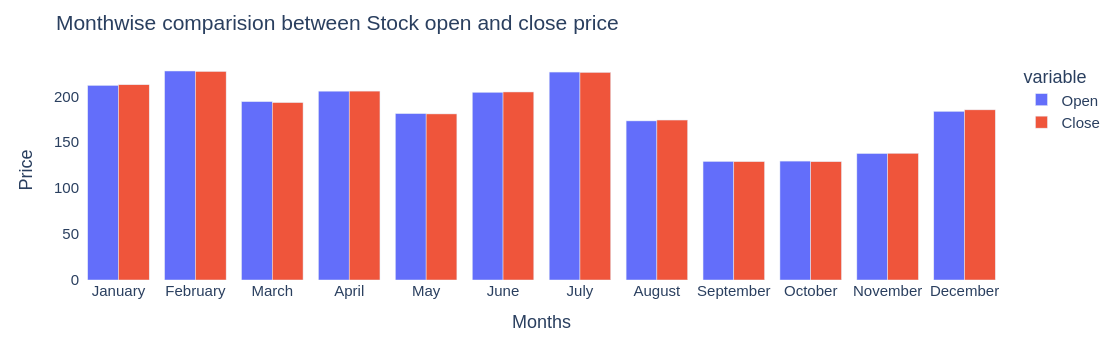

In [392]:
fig=px.bar(monthwise)
fig.update_layout(barmode='group',title='Monthwise comparision between Stock open and close price',
                 font_size=15,xaxis_title='Months',yaxis_title='Price')
fig.update_layout({'plot_bgcolor':'white'})


fig.show()

### Monthwise comparison between Stock high and low price

In [393]:
monthwise=data.groupby(data.index.strftime('%B'))[['High','Low']].mean()
# monthwise.head()

month=['January','February','March','April','May','June','July','August','September','October',
       'November','December']
monthwise=monthwise.reindex(month)
monthwise

,High,Low
Date,,
January,216.422843,207.981666
February,232.555875,221.189790
March,199.200763,186.967436
April,210.014173,201.183262
May,184.650641,177.194171
June,208.224298,201.003944
July,231.242849,220.747170
August,177.112380,170.228433
September,132.665148,124.469089


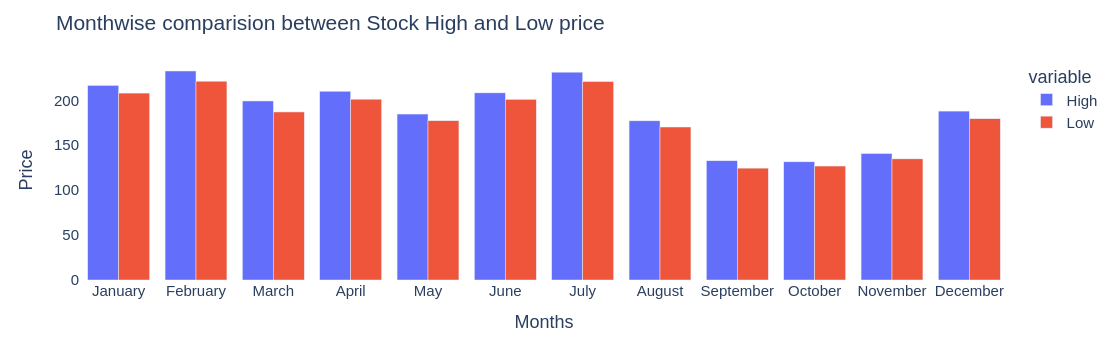

In [394]:
fig=px.bar(monthwise)
fig.update_layout(barmode='group',title='Monthwise comparision between Stock High and Low price',
                 font_size=15,xaxis_title='Months',yaxis_title='Price')
fig.update_layout({'plot_bgcolor':'white'})


fig.show()

## 2. Simple Time series or Run sequence (Separate year-wise plots)

In [395]:
def plot(year,comp1,comp2):
    fig=px.line(data.loc[year],x=data.loc[year].index,y=[comp1,comp2])
    fig.update_layout(title=f'Analyzing the stocks in {year}',
                     xaxis_title='Month',yaxis_title='Prices')
    fig.update_layout({'plot_bgcolor':'white'})
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

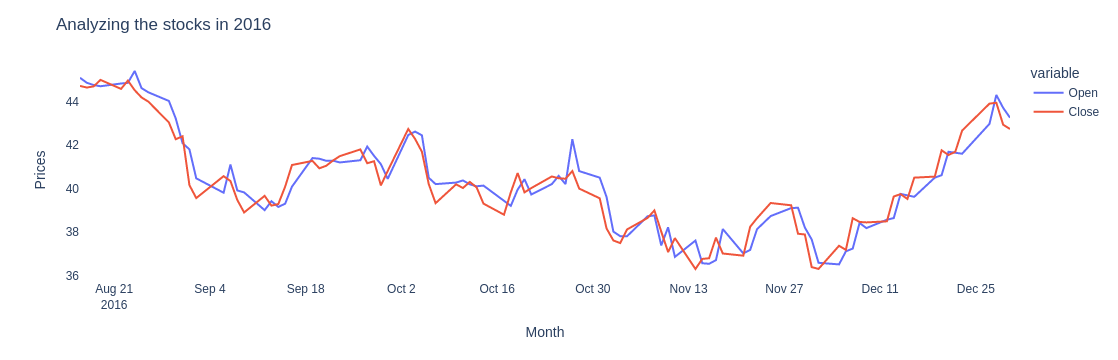

In [396]:
plot('2016','Open','Close')

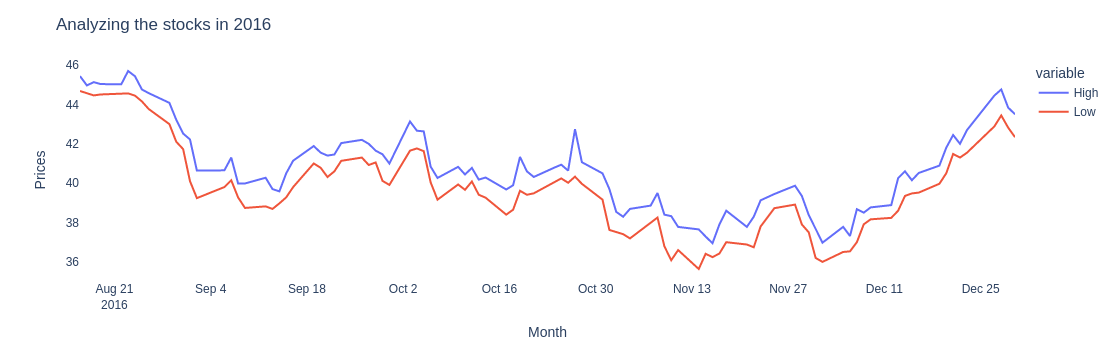

In [397]:
plot('2016','High','Low')

## 3. Seasonal plot

In [398]:
def re_index(dataframe):

    indexes_old = list(dataframe.index)
    indexes_new = [i.split(',')[0] for i in indexes_old]
    dataframe = dataframe.rename(index = dict(zip(indexes_old, indexes_new)))

    return dataframe

In [399]:
monthwise = data.groupby(data.index.strftime('%B, %Y'))[['Open','Close']].mean()
# print(monthwise.index)

indexes_new = []
for i in [2016,2017,2018,2019,2020,2021]:
    for j in ['January','February','March','April','May','June','July','August','September','October',
       'November','December']:
        indexes_new.append(j+', '+str(i))

monthwise = monthwise.reindex(indexes_new)

year_2016 = monthwise[0:12]
year_2016 = re_index(year_2016)

year_2017 = monthwise[12:12*2]
year_2017 = re_index(year_2017)

year_2018 = monthwise[12*2:12*3]
year_2018 = re_index(year_2018)

year_2019 = monthwise[12*3:12*4]
year_2019 = re_index(year_2019)

year_2020 = monthwise[12*4:12*5]
year_2020 = re_index(year_2020)

year_2021 = monthwise[12*5:12*6]
year_2021 = re_index(year_2021)

data_Open = pd.DataFrame(columns = ['2016', '2017', '2018', '2019', '2020', '2021'])
data_Open['2016'] = year_2016['Open']
data_Open['2017'] = year_2017['Open']
data_Open['2018'] = year_2018['Open']
data_Open['2019'] = year_2019['Open']
data_Open['2020'] = year_2020['Open']
data_Open['2021'] = year_2021['Open']

# data_Open

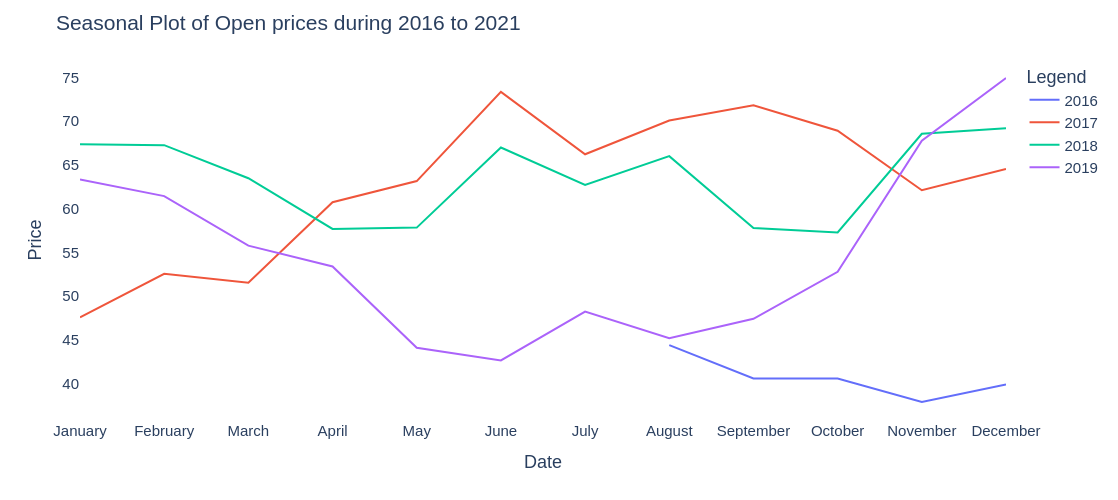

In [400]:
fig=px.line(data_Open,x=data_Open.index,y=[data_Open['2016'],data_Open['2017'],data_Open['2018'],data_Open['2019']],labels={'Date':'Date','value':'Price'},
           width=800,height=500)
fig.update_layout(title='Seasonal Plot of Open prices during 2016 to 2021',font_size=15,
                 legend_title_text='Legend')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({'plot_bgcolor':'white'})
fig.show()

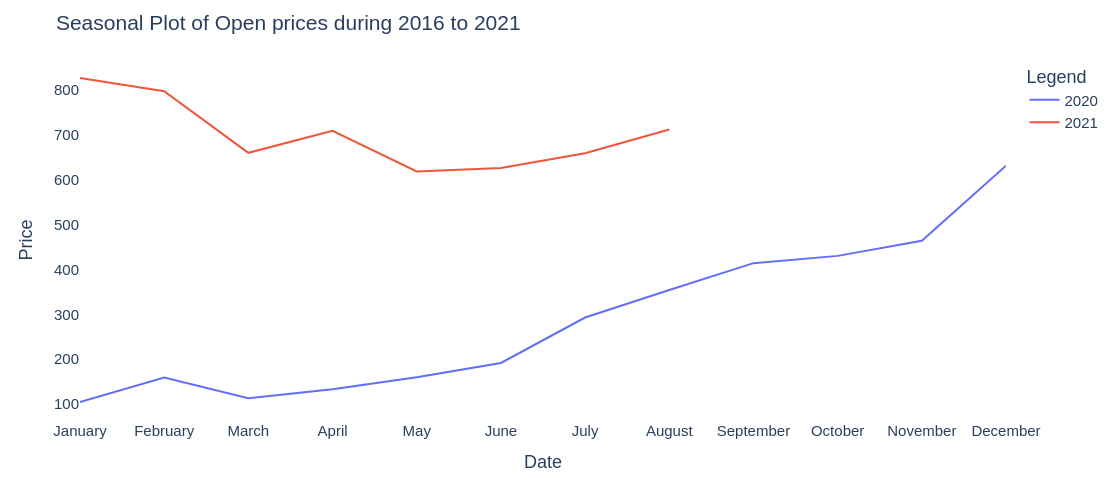

In [401]:
fig=px.line(data_Open,x=data_Open.index,y=[data_Open['2020'],data_Open['2021']],labels={'Date':'Date','value':'Price'},
           width=800,height=500)
fig.update_layout(title='Seasonal Plot of Open prices during 2016 to 2021',font_size=15,
                 legend_title_text='Legend')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout({'plot_bgcolor':'white'})
fig.show()

## 4. Seasonal Polar Plot

In [402]:
monthwise_polar = monthwise.reset_index()

monthwise_polar['Month'] = monthwise_polar['Date'].str.split(",").str.get(0)
monthwise_polar['Year'] = monthwise_polar['Date'].str.split(",").str.get(1)
# monthwise_polar.info()

monthwise_polar = monthwise_polar.set_index('Date')
monthwise_polar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, January, 2016 to December, 2021
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    61 non-null     float64
 1   Close   61 non-null     float64
 2   Month   72 non-null     object 
 3   Year    72 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.8+ KB


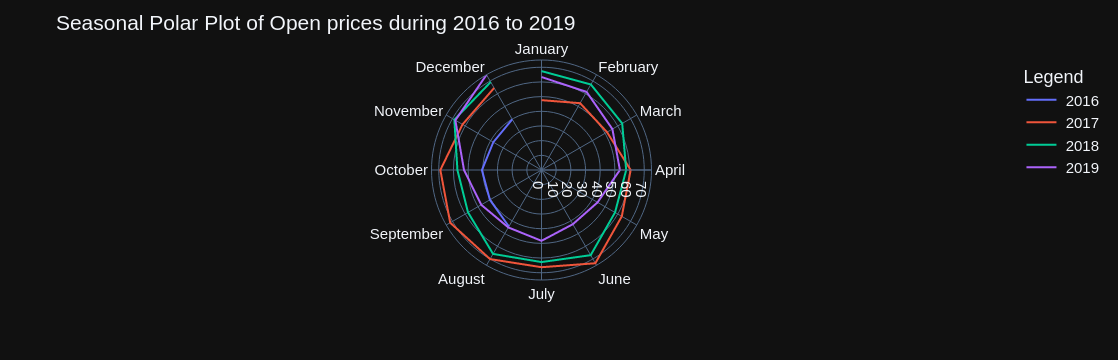

In [403]:
i = monthwise_polar[(monthwise_polar['Year'].str.contains("2020|2021"))].index
monthwise_polar_1 = monthwise_polar.drop(i)
# monthwise_polar_1

fig=px.line_polar(monthwise_polar_1,r='Open', theta='Month', color='Year', template="plotly_dark")
fig.update_layout(title='Seasonal Polar Plot of Open prices during 2016 to 2019',font_size=15,
                 legend_title_text='Legend')
fig.update_layout({'plot_bgcolor':'white'})
fig.show()

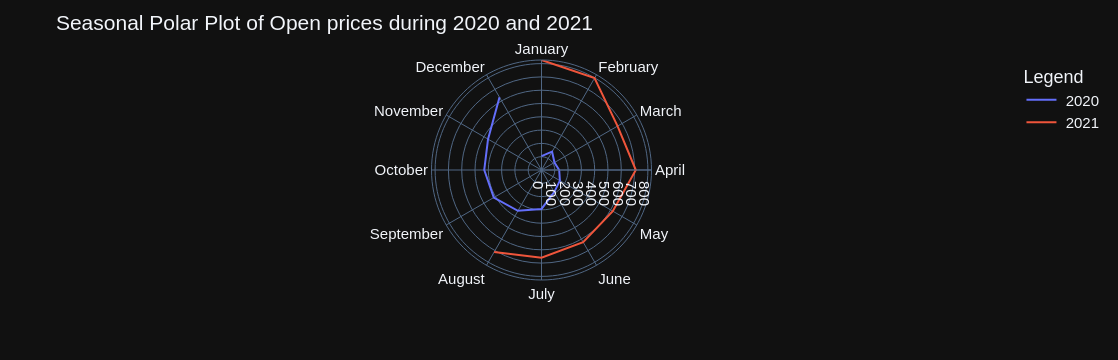

In [404]:
i = monthwise_polar[(monthwise_polar['Year'].str.contains("2016|2017|2018|2019"))].index
monthwise_polar_2 = monthwise_polar.drop(i)
# monthwise_polar_1

fig=px.line_polar(monthwise_polar_2,r='Open', theta='Month', color='Year', template="plotly_dark")
fig.update_layout(title='Seasonal Polar Plot of Open prices during 2020 and 2021',font_size=15,
                 legend_title_text='Legend')
fig.update_layout({'plot_bgcolor':'white'})
fig.show()